In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mean
import re

In [68]:
campaign_desc_df = pd.read_csv('campaign_desc.csv')
campaign_table_df = pd.read_csv('campaign_table.csv')
causal_data_df = pd.read_csv('causal_data.csv')
coupon_redempt_df = pd.read_csv('coupon_redempt.csv')
coupon_df = pd.read_csv('coupon.csv')
hh_demographic_df = pd.read_csv('hh_demographic.csv')
product_df = pd.read_csv('product.csv')
transaction_data_df = pd.read_csv('transaction_data.csv')



In [69]:
campaign_desc_df.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [8]:
campaign_table_df.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [9]:
causal_data_df.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer
0,26190,286,70,0,A
1,26190,288,70,0,A
2,26190,289,70,0,A
3,26190,292,70,0,A
4,26190,293,70,0,A


In [10]:
coupon_redempt_df.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [11]:
coupon_df.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [12]:
hh_demographic_df.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [13]:
product_df.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [65]:
transaction_data_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


## Exploratory Data Analysis

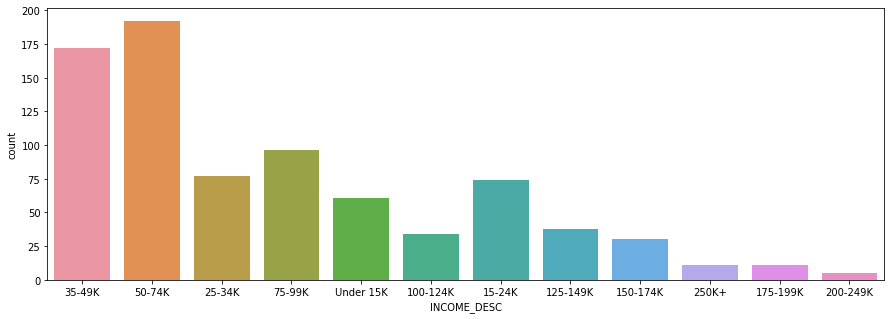

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(x="INCOME_DESC",data=hh_demographic_df);

Most of the households below to 50-74K income group. Let's convert this to a mean household income.

In [71]:
#hh_demographic_df["Mean_Income"]=
def get_mean_income(row):
    string_list=re.split("-",row)
    if 'Under' in string_list[0] or '+' in string_list[0]:
        if 'Under' in string_list[0]:
            low=0
        else:
            low=250000
    else:
        low=int(string_list[0])*1000
        
    if 'Under' in string_list[0] or '+' in string_list[0]:
        if 'Under' in string_list[0]:
            high=15000
        else:
            high=250000
    else:
        high=int(string_list[1].rstrip("K"))*1000
    
    data=(low,high)
    return mean(data)

hh_demographic_df["Mean_Income"] = hh_demographic_df["INCOME_DESC"].apply(get_mean_income)

In [72]:
hh_demographic_df["Mean_Income"]

0       42000
1       62000
2       29500
3       87000
4       62000
5        7500
6      112000
7       19500
8       87000
9       87000
10      62000
11      29500
12      42000
13     137000
14       7500
15      62000
16      19500
17     162000
18      42000
19      42000
20      62000
21      42000
22     112000
23      42000
24     162000
25       7500
26      29500
27      19500
28     112000
29      29500
        ...  
771     19500
772    137000
773    112000
774      7500
775     19500
776    162000
777      7500
778     62000
779     42000
780     62000
781    137000
782     42000
783    137000
784     29500
785     62000
786    187000
787     62000
788     29500
789     19500
790     87000
791    162000
792     87000
793     29500
794     42000
795     62000
796     62000
797     87000
798     42000
799     62000
800      7500
Name: Mean_Income, Length: 801, dtype: int64

Joining data and keeping what's important.

In [73]:
total_household=transaction_data_df.groupby('WEEK_NO').household_key.nunique()
total_household=total_household.reset_index()

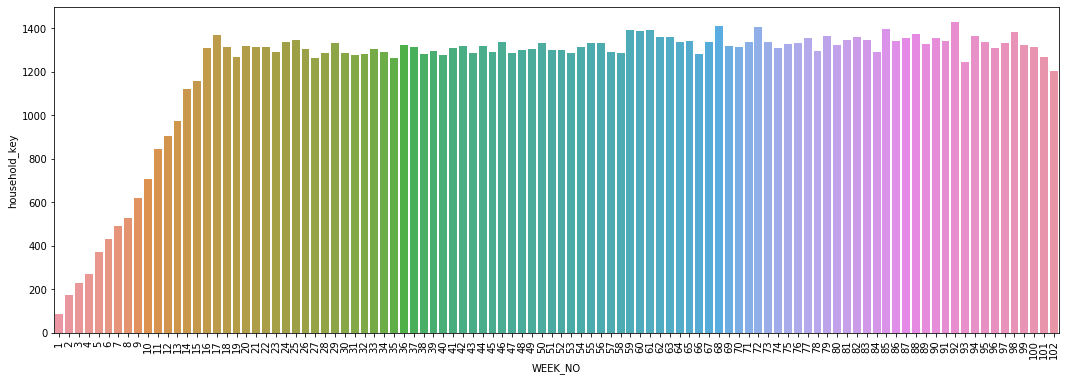

In [74]:
fig = plt.figure(1, figsize=(18,6))
ax=sns.barplot(x='WEEK_NO',y='household_key',data=total_household)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Declining  in last 4 weeks.

In [82]:
churn=transaction_data_df.groupby('household_key').agg({'WEEK_NO':'max'}).reset_index()
churn['has_churned']=(churn['WEEK_NO']>98).astype(int)
del churn['WEEK_NO']

In [83]:
household_master=pd.merge(hh_demographic_df,churn,on='household_key')

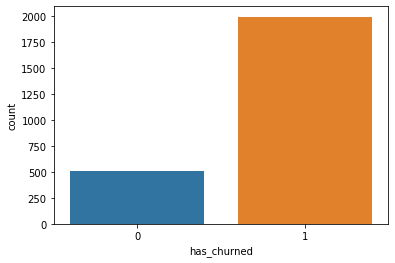

In [84]:
ax=sns.countplot(churn['has_churned'])

Feature Engineering

In [98]:
household_campaign=pd.merge(household_master,campaign_table_df,on='household_key')

In [99]:
household_campaign=household_campaign.groupby(['household_key','DESCRIPTION']).agg({'CAMPAIGN':'count'}).reset_index()


,household_key,DESCRIPTION,CAMPAIGN
0,1,TypeA,3
1,1,TypeB,4
2,1,TypeC,1
3,7,TypeA,1
4,7,TypeB,3
5,8,TypeA,3
6,8,TypeB,7
7,13,TypeA,3
8,13,TypeB,6
9,13,TypeC,1


In [106]:
campaign_type=household_campaign.pivot(index='household_key',columns='DESCRIPTION',values='CAMPAIGN').fillna(0)

In [108]:
household_master=pd.merge(household_master,campaign_type,on='household_key')